# Import Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Preprocessing

Load Data

In [ ]:
# Tentukan direktori dataset tambahkan Augmentasi (Flip = Horizontal)
import os
import numpy as np
import cv2

def load_data(data_dir):
    images = []
    masks = []
    filenames = []  # Array untuk menyimpan nama file

    for filename in os.listdir(os.path.join(data_dir, 'images')):
        if filename.endswith(('.jpeg','.jpg', 'png')):
            img = cv2.imread(os.path.join(data_dir, 'images', filename))
            img = cv2.resize(img, (256, 256))
            images.append(img)

            mask = cv2.imread(os.path.join(data_dir, 'masks', filename), cv2.IMREAD_GRAYSCALE)
            mask = cv2.resize(mask, (256, 256))
            mask = np.stack([mask, 255 - mask], axis=-1)  # one-hot encoding
            masks.append(mask)

            # Simpan nama file
            filenames.append(filename)

    return np.array(images), np.array(masks), filenames  # Mengembalikan array nama file juga

Split Data

In [ ]:
# Tentukan direktori dataset
import os
import numpy as np
import cv2
data_dir = '/content/drive/MyDrive/Regression ASHOKA/Dataset'

# Baca dataset
X, y, filenames = load_data(data_dir)

# Modifikasi rasio
train_ratio = 0.8
validation_ratio = 0.1
test_ratio = 0.1
random_state = 42

In [ ]:
from sklearn.model_selection import train_test_split
# Bagi data menjadi data latih, data validasi, dan data uji
X_train, X_temp, y_train, y_temp, filenames_train, filenames_temp = train_test_split(
    X, y, filenames, test_size=1 - train_ratio, random_state=random_state, shuffle=True, stratify=None
)

X_val, X_test, y_val, y_test, filenames_val, filenames_test = train_test_split(
    X_temp, y_temp, filenames_temp, test_size=test_ratio / (test_ratio + validation_ratio),
    random_state=random_state, shuffle=True, stratify=None
)
print(len(X_train), len(X_val), len(X_test), len(y_train), len(y_val), len(y_test))


730 91 92 730 91 92


In [ ]:
# Normalize
y_train_conf = y_train.astype('float32') / 255.0  # Konversi ke float32 dan normalisasi
y_val_conf = y_val.astype('float32') / 255.0

# Pastikan data masukan (X_train dan X_val) telah dinormalisasi ke rentang [0, 1]
X_train_conf = X_train.astype('float32') / 255.0
X_val_conf = X_val.astype('float32') / 255.0

X_test_c = X_test.astype('float32') / 255.0
y_test_c = y_test.astype('float32') / 255.0

# Labeling

Data Training

In [ ]:
import os
import csv
import cv2
import numpy as np

# Path to the folder containing PNG images
folder_path = '/content/drive/MyDrive/TREK-AI/BinaryMasks/train_images'

# Output CSV file
csv_file_path = 'train.csv'

# Create a list to store CSV data
csv_data = [['Nama file', 'Derajat Kelengkungan']]

# Iterate through each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.png'):
        # Read the image
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Normalize the image
        normalized_image = image / 255.0

        # Count the number of white pixels as curvature
        derajat = np.sum(normalized_image == 1.0)  # Using np.sum

        # Set curvature values based on filename
        if "Don" in filename:
            derajat = 75
        elif "Harold" in filename:
            derajat = 33
        elif "Jack" in filename:
            derajat = 88
        elif "Peter" in filename:
            derajat = 86
        elif "Rick" in filename:
            derajat = 60
        elif "Tom" in filename:
            derajat = 18
        elif "John" in filename:
            derajat = 58
        elif "Jim" in filename:
            derajat = 40
        elif "Pedro" in filename:
            derajat = 50

        # Add data to the CSV list
        csv_data.append([filename, derajat])

# Write CSV data to a file
with open(csv_file_path, 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerows(csv_data)

print(f'CSV file saved at: {csv_file_path}')

CSV file saved at: train.csv


Data Validation

In [ ]:
import os
import csv
import cv2
import numpy as np

# Path to the folder containing PNG images
folder_path = '/content/drive/MyDrive/TREK-AI/BinaryMasks/val_images'

# Output CSV file
csv_file_path = 'val.csv'

# Create a list to store CSV data
csv_data = [['Nama file', 'Derajat Kelengkungan']]

# Iterate through each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.png'):
        # Read the image
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Normalize the image
        normalized_image = image / 255.0

        # Count the number of white pixels as curvature
        derajat = np.sum(normalized_image == 1.0)  # Using np.sum

        # Set curvature values based on filename
        if "Don" in filename:
            derajat = 75
        elif "Harold" in filename:
            derajat = 33
        elif "Jack" in filename:
            derajat = 88
        elif "Peter" in filename:
            derajat = 86
        elif "Rick" in filename:
            derajat = 60
        elif "Tom" in filename:
            derajat = 18
        elif "John" in filename:
            derajat = 58
        elif "Jim" in filename:
            derajat = 40
        elif "Pedro" in filename:
            derajat = 50

        # Add data to the CSV list
        csv_data.append([filename, derajat])

# Write CSV data to a file
with open(csv_file_path, 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerows(csv_data)

print(f'CSV file saved at: {csv_file_path}')

CSV file saved at: val.csv


Data Testing

In [ ]:
import os
import csv
import cv2
import numpy as np

# Path to the folder containing PNG images
folder_path = '/content/drive/MyDrive/TREK-AI/BinaryMasks/test_images'

# Output CSV file
csv_file_path = 'test.csv'

# Create a list to store CSV data
csv_data = [['Nama file', 'Derajat Kelengkungan']]

# Iterate through each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.png'):
        # Read the image
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Normalize the image
        normalized_image = image / 255.0

        # Count the number of white pixels as curvature
        derajat = np.sum(normalized_image == 1.0)  # Using np.sum

        # Set curvature values based on filename
        if "Don" in filename:
            derajat = 75
        elif "Harold" in filename:
            derajat = 33
        elif "Jack" in filename:
            derajat = 88
        elif "Peter" in filename:
            derajat = 86
        elif "Rick" in filename:
            derajat = 60
        elif "Tom" in filename:
            derajat = 18
        elif "John" in filename:
            derajat = 58
        elif "Jim" in filename:
            derajat = 40
        elif "Pedro" in filename:
            derajat = 50

        # Add data to the CSV list
        csv_data.append([filename, derajat])

# Write CSV data to a file
with open(csv_file_path, 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerows(csv_data)

print(f'CSV file saved at: {csv_file_path}')

CSV file saved at: test.csv


Preprocessing data image to csv

In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the path to your dataset folders
train_data_dir = "/content/drive/MyDrive/TREK-AI/BinaryMasks/train_images" # Path to the training data folder
val_data_dir = "/content/drive/MyDrive/TREK-AI/BinaryMasks/val_images" # Path to the validation data folder
test_data_dir = "/content/drive/MyDrive/TREK-AI/BinaryMasks/test_images" # Path to the testing data folder

train_labels_path="/content/train.csv" # Path to your training CSV file containing labels
val_labels_path= "/content/val.csv" # Path to your validation CSV file containing labels
test_labels_path="/content/test.csv" # Path to your testing CSV file containing labels

# Load labels from CSV files
train_labels = pd.read_csv(train_labels_path)
val_labels = pd.read_csv(val_labels_path)
test_labels = pd.read_csv(test_labels_path)

# Parameters on your image dimensions
input_shape = (256, 256, 3) # Adjust based
num_classes = 1 # We're predicting a single continuous value (regression)

# Data preprocessing and augmentation
train_datagen = ImageDataGenerator (rescale=1.0/255, rotation_range=40, horizontal_flip=True, fill_mode='nearest')
val_datagen = ImageDataGenerator (rescale=1.0/255)# No augmentation for validation data
test_datagen = ImageDataGenerator (rescale=1.0/255)# No augmentation for validation data

# Data preprocessing and no augmentation
train_datagen_no_augmented = ImageDataGenerator (rescale=1.0/255)
val_datagen = ImageDataGenerator (rescale=1.0/255)# No augmentation for validation data
test_datagen = ImageDataGenerator (rescale=1.0/255)# No augmentation for validation data

# Create a generator for the training data with augmentation
train_generator = train_datagen.flow_from_dataframe(
      dataframe=train_labels,
      directory=train_data_dir,
      x_col="Nama file",
      y_col="Derajat Kelengkungan",
      target_size=input_shape[:2],
      batch_size=32,
      class_mode="raw",
      shuffle=True,
)
# Create a generator for the training data with no augmentation
train_generator_no_augmented = train_datagen_no_augmented.flow_from_dataframe(
      dataframe=train_labels,
      directory=train_data_dir,
      x_col="Nama file",
      y_col="Derajat Kelengkungan",
      target_size=input_shape[:2],
      batch_size=32,
      class_mode="raw",
      shuffle=True,
)
# Create a generator for the validation data
val_generator = val_datagen.flow_from_dataframe (
    dataframe=val_labels, directory=val_data_dir,
    x_col="Nama file",
    y_col="Derajat Kelengkungan",
    target_size=input_shape[:2],
    batch_size=32,
    class_mode="raw",
    shuffle=False,
)
# Create a generator for the testing data
test_generator = test_datagen.flow_from_dataframe (
    dataframe=test_labels, directory=test_data_dir,
    x_col="Nama file",
    y_col="Derajat Kelengkungan",
    target_size=input_shape[:2],
    batch_size=32,
    class_mode="raw",
    shuffle=False,
)

Found 730 validated image filenames.
Found 730 validated image filenames.
Found 91 validated image filenames.
Found 92 validated image filenames.


# Modelling

In [ ]:
!pip install tensorflow
!pip install efficientnet
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

# EfficientNetB0

No Augmentation

In [ ]:
from efficientnet.tfkeras import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay

# Menggunakan DenseNet121 sebagai pre-trained model
pre_trained_model = EfficientNetB0(input_shape=(256, 256, 3), weights='imagenet', include_top=False)

# Menambahkan GlobalAveragePooling2D sebagai alternatif Flatten
x = GlobalAveragePooling2D()(pre_trained_model.output)

# Menambahkan beberapa layer Dense tambahan dengan BatchNormalization
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)

# Mengganti output layer untuk tugas regresi
x = Dense(1, activation='linear')(x)

model_efficientnetb0_no_augmented = Model(pre_trained_model.input, x)

# Compile model dengan optimizer Adam dan learning rate scheduling
initial_learning_rate = 0.001
lr_schedule = ExponentialDecay(initial_learning_rate, decay_steps=10000, decay_rate=0.9)
optimizer = Adam(learning_rate=lr_schedule)

model_efficientnetb0_no_augmented.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['mean_absolute_error'])

history_efficientnetb0_no_augmented = model_efficientnetb0_no_augmented.fit(train_generator_no_augmented, epochs=100, validation_data=val_generator, verbose=1)

Epoch 1/100
23/23 [==============================] - 45s 412ms/step - loss: 52.7465 - mean_absolute_error: 52.7465 - val_loss: 46.4995 - val_mean_absolute_error: 46.4995
Epoch 2/100
23/23 [==============================] - 7s 321ms/step - loss: 30.9108 - mean_absolute_error: 30.9108 - val_loss: 105.2639 - val_mean_absolute_error: 105.2639
Epoch 3/100
23/23 [==============================] - 8s 338ms/step - loss: 11.1830 - mean_absolute_error: 11.1830 - val_loss: 34.3009 - val_mean_absolute_error: 34.3009
Epoch 4/100
23/23 [==============================] - 8s 324ms/step - loss: 9.5466 - mean_absolute_error: 9.5466 - val_loss: 47.4047 - val_mean_absolute_error: 47.4047
Epoch 5/100
23/23 [==============================] - 8s 336ms/step - loss: 11.0304 - mean_absolute_error: 11.0304 - val_loss: 34.7254 - val_mean_absolute_error: 34.7254
Epoch 6/100
23/23 [==============================] - 8s 325ms/step - loss: 11.2820 - mean_absolute_error: 11.2820 - val_loss: 35.2342 - val_mean_absolute_

In [ ]:
model_efficientnetb0_no_augmented.save('/content/drive/MyDrive/Regression ASHOKA/model_save/EfficientNetB0(2).h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


With Augmentation

In [ ]:
from efficientnet.tfkeras import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay

# Menggunakan DenseNet121 sebagai pre-trained model
pre_trained_model = EfficientNetB0(input_shape=(256, 256, 3), weights='imagenet', include_top=False)

# Menambahkan GlobalAveragePooling2D sebagai alternatif Flatten
x = GlobalAveragePooling2D()(pre_trained_model.output)

# Menambahkan beberapa layer Dense tambahan dengan BatchNormalization
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)

# Mengganti output layer untuk tugas regresi
x = Dense(1, activation='linear')(x)

model_efficientnetb0 = Model(pre_trained_model.input, x)

# Compile model dengan optimizer Adam dan learning rate scheduling
initial_learning_rate = 0.001
lr_schedule = ExponentialDecay(initial_learning_rate, decay_steps=10000, decay_rate=0.9)
optimizer = Adam(learning_rate=lr_schedule)

model_efficientnetb0.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['mean_absolute_error'])

history_efficientnetb0 = model_efficientnetb0.fit(train_generator, epochs=100, validation_data=val_generator, verbose=1)

Epoch 1/100
23/23 [==============================] - 52s 715ms/step - loss: 53.4436 - mean_absolute_error: 53.4436 - val_loss: 53.5755 - val_mean_absolute_error: 53.5755
Epoch 2/100
23/23 [==============================] - 16s 660ms/step - loss: 34.1039 - mean_absolute_error: 34.1039 - val_loss: 17.4047 - val_mean_absolute_error: 17.4047
Epoch 3/100
23/23 [==============================] - 16s 679ms/step - loss: 14.5328 - mean_absolute_error: 14.5328 - val_loss: 18.3945 - val_mean_absolute_error: 18.3945
Epoch 4/100
23/23 [==============================] - 16s 675ms/step - loss: 13.7728 - mean_absolute_error: 13.7728 - val_loss: 11.5136 - val_mean_absolute_error: 11.5136
Epoch 5/100
23/23 [==============================] - 16s 692ms/step - loss: 12.3208 - mean_absolute_error: 12.3208 - val_loss: 24.9977 - val_mean_absolute_error: 24.9977
Epoch 6/100
23/23 [==============================] - 16s 675ms/step - loss: 11.4197 - mean_absolute_error: 11.4197 - val_loss: 11.1663 - val_mean_abso

In [ ]:
model_efficientnetb0.save('/content/drive/MyDrive/Regression ASHOKA/model_save/EfficientNetB0.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 2s 96ms/step


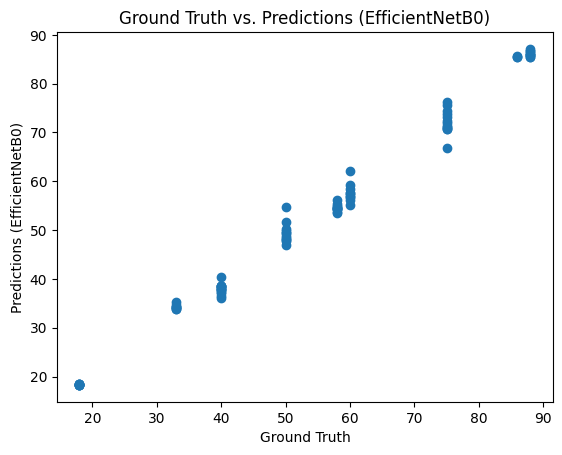

In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the saved resnet50 model
model_efficientnetb0= load_model('/content/drive/MyDrive/Regression ASHOKA/model_save/EfficientNetB0.h5')

# Load data validasi dari file CSV
csv_path = '/content/val.csv'
validation_data = pd.read_csv(csv_path)

# Ambil nilai Ground_Truth sebagai ground truth
ground_truth = validation_data['Derajat Kelengkungan'].values

# Lakukan prediksi dengan model EfficientNetB0 pada data validasi
# Pastikan Anda memuat dan memproses data validasi sesuai dengan format yang diperlukan untuk model
predictions_efficeintnetb0 = model_efficientnetb0.predict(val_generator)  # Ganti val_generator dengan data validasi yang sesuai

# Plotting Ground Truth vs. Predictions
plt.scatter(ground_truth, predictions_efficeintnetb0.flatten())
plt.xlabel('Ground Truth')
plt.ylabel('Predictions (EfficientNetB0)')
plt.title('Ground Truth vs. Predictions (EfficientNetB0)')
plt.show()

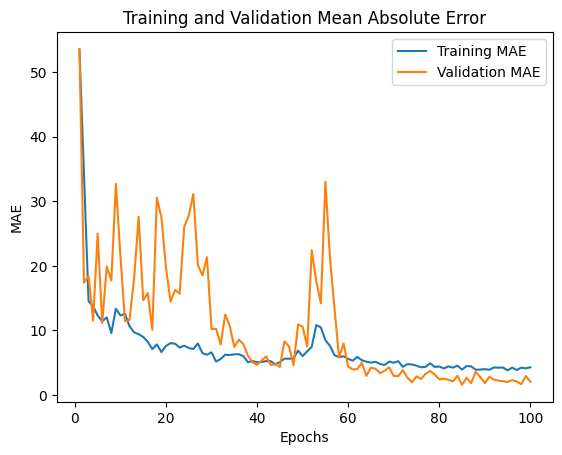

In [ ]:
import matplotlib.pyplot as plt

# Plotting MAE pada set pelatihan dan set validasi
train_mae = history_efficientnetb0.history['mean_absolute_error']
val_mae = history_efficientnetb0.history['val_mean_absolute_error']
epochs = range(1, len(train_mae) + 1)

plt.plot(epochs, train_mae, label='Training MAE')
plt.plot(epochs, val_mae, label='Validation MAE')
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

# InceptionResNetV2

No Augmentation

In [ ]:
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay

# Menggunakan DenseNet121 sebagai pre-trained model
pre_trained_model = InceptionResNetV2(input_shape=(256, 256, 3), weights='imagenet', include_top=False)

# Menambahkan GlobalAveragePooling2D sebagai alternatif Flatten
x = GlobalAveragePooling2D()(pre_trained_model.output)

# Menambahkan beberapa layer Dense tambahan dengan BatchNormalization
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)

# Mengganti output layer untuk tugas regresi
x = Dense(1, activation='linear')(x)

model_inceptionresnet_no_augmented = Model(pre_trained_model.input, x)

# Compile model dengan optimizer Adam dan learning rate scheduling
initial_learning_rate = 0.001
lr_schedule = ExponentialDecay(initial_learning_rate, decay_steps=10000, decay_rate=0.9)
optimizer = Adam(learning_rate=lr_schedule)

model_inceptionresnet_no_augmented.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['mean_absolute_error'])

history_inceptionresnet_no_augmented = model_inceptionresnet_no_augmented.fit(train_generator_no_augmented, epochs=100, validation_data=val_generator, verbose=1)

219055592/219055592 [==============================] - 5s 0us/step
Epoch 1/100
23/23 [==============================] - 134s 1s/step - loss: 49.2663 - mean_absolute_error: 49.2663 - val_loss: 1653.0933 - val_mean_absolute_error: 1653.0933
Epoch 2/100
23/23 [==============================] - 17s 737ms/step - loss: 25.2326 - mean_absolute_error: 25.2326 - val_loss: 35.2685 - val_mean_absolute_error: 35.2685
Epoch 3/100
23/23 [==============================] - 17s 752ms/step - loss: 14.6052 - mean_absolute_error: 14.6052 - val_loss: 425.7663 - val_mean_absolute_error: 425.7663
Epoch 4/100
23/23 [==============================] - 18s 764ms/step - loss: 10.5367 - mean_absolute_error: 10.5367 - val_loss: 27.1292 - val_mean_absolute_error: 27.1292
Epoch 5/100
23/23 [==============================] - 18s 784ms/step - loss: 9.4112 - mean_absolute_error: 9.4112 - val_loss: 15.6173 - val_mean_absolute_error: 15.6173
Epoch 6/100
23/23 [==============================] - 17s 745ms/step - loss: 7.984

In [ ]:
model_inceptionresnet_no_augmented.save('/content/drive/MyDrive/Regression ASHOKA/model_save/InceptionResNetV2(2).h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


With Augmentation

In [ ]:
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay

# Menggunakan DenseNet121 sebagai pre-trained model
pre_trained_model = InceptionResNetV2(input_shape=(256, 256, 3), weights='imagenet', include_top=False)

# Menambahkan GlobalAveragePooling2D sebagai alternatif Flatten
x = GlobalAveragePooling2D()(pre_trained_model.output)

# Menambahkan beberapa layer Dense tambahan dengan BatchNormalization
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)

# Mengganti output layer untuk tugas regresi
x = Dense(1, activation='linear')(x)

model_inceptionresnet = Model(pre_trained_model.input, x)

# Compile model dengan optimizer Adam dan learning rate scheduling
initial_learning_rate = 0.001
lr_schedule = ExponentialDecay(initial_learning_rate, decay_steps=10000, decay_rate=0.9)
optimizer = Adam(learning_rate=lr_schedule)

model_inceptionresnet.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['mean_absolute_error'])

history_inceptionresnet = model_inceptionresnet.fit(train_generator, epochs=100, validation_data=val_generator, verbose=1)

219055592/219055592 [==============================] - 1s 0us/step
Epoch 1/100
23/23 [==============================] - 160s 2s/step - loss: 52.5087 - mean_absolute_error: 52.5087 - val_loss: 94.6420 - val_mean_absolute_error: 94.6420
Epoch 2/100
23/23 [==============================] - 21s 918ms/step - loss: 34.2206 - mean_absolute_error: 34.2206 - val_loss: 60569.3281 - val_mean_absolute_error: 60569.3281
Epoch 3/100
23/23 [==============================] - 23s 954ms/step - loss: 16.3117 - mean_absolute_error: 16.3117 - val_loss: 3510.3057 - val_mean_absolute_error: 3510.3057
Epoch 4/100
23/23 [==============================] - 22s 937ms/step - loss: 12.0658 - mean_absolute_error: 12.0658 - val_loss: 27.4055 - val_mean_absolute_error: 27.4055
Epoch 5/100
23/23 [==============================] - 22s 927ms/step - loss: 13.3219 - mean_absolute_error: 13.3219 - val_loss: 80.8659 - val_mean_absolute_error: 80.8659
Epoch 6/100
23/23 [==============================] - 22s 925ms/step - loss:

In [ ]:
model_inceptionresnet.save('/content/drive/MyDrive/Regression ASHOKA/model_save/InceptionResNetV2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 4s 228ms/step


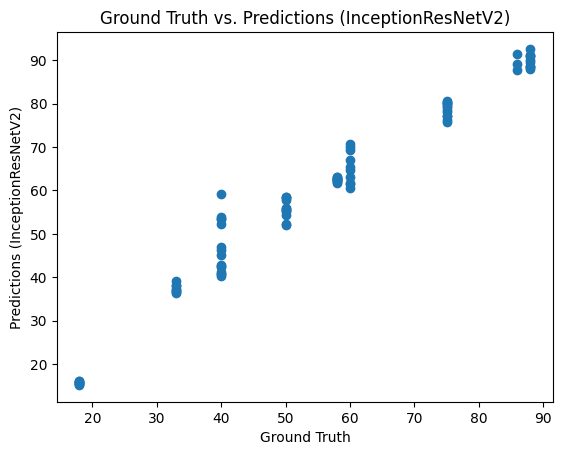

In [ ]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the saved DenseNet201 model
model_inceptionresnet = load_model('/content/drive/MyDrive/Regression ASHOKA/model_save/InceptionResNetV2.h5')

# Load validation data from CSV file
csv_path = '/content/val.csv'
validation_data = pd.read_csv(csv_path)

# Extract Ground Truth as ground truth
ground_truth = validation_data['Derajat Kelengkungan'].values

# Perform predictions with the DenseNet201 model on validation data
# Make sure you load and preprocess the validation data according to the format required by the model
predictions_inceptionresnet = model_inceptionresnet.predict(val_generator)

# Plotting Ground Truth vs. Predictions
plt.scatter(ground_truth, predictions_inceptionresnet.flatten())
plt.xlabel('Ground Truth')
plt.ylabel('Predictions (InceptionResNetV2)')
plt.title('Ground Truth vs. Predictions (InceptionResNetV2)')
plt.show()


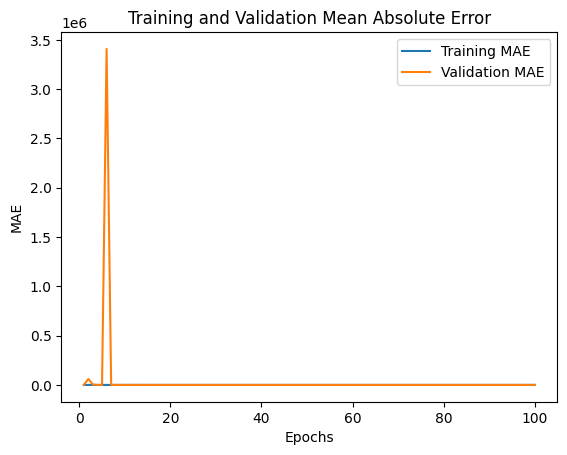

In [ ]:
import matplotlib.pyplot as plt

# Plotting MAE pada set pelatihan dan set validasi
train_mae = history_inceptionresnet.history['mean_absolute_error']
val_mae = history_inceptionresnet.history['val_mean_absolute_error']
epochs = range(1, len(train_mae) + 1)

plt.plot(epochs, train_mae, label='Training MAE')
plt.plot(epochs, val_mae, label='Validation MAE')
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

# InceptionV3

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay

# Menggunakan DenseNet121 sebagai pre-trained model
pre_trained_model = InceptionV3(input_shape=(256, 256, 3), weights='imagenet', include_top=False)

# Menambahkan GlobalAveragePooling2D sebagai alternatif Flatten
x = GlobalAveragePooling2D()(pre_trained_model.output)

# Menambahkan beberapa layer Dense tambahan dengan BatchNormalization
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)

# Mengganti output layer untuk tugas regresi
x = Dense(1, activation='linear')(x)

model_inceptionv3_no_augmented = Model(pre_trained_model.input, x)

# Compile model dengan optimizer Adam dan learning rate scheduling
initial_learning_rate = 0.001
lr_schedule = ExponentialDecay(initial_learning_rate, decay_steps=10000, decay_rate=0.9)
optimizer = Adam(learning_rate=lr_schedule)

model_inceptionv3_no_augmented.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['mean_absolute_error'])

history_inceptionv3_no_augmented = model_inceptionv3_no_augmented.fit(train_generator_no_augmented, epochs=100, validation_data=val_generator, verbose=1)

87910968/87910968 [==============================] - 4s 0us/step
Epoch 1/100
23/23 [==============================] - 66s 923ms/step - loss: 52.2846 - mean_absolute_error: 52.2846 - val_loss: 42.5416 - val_mean_absolute_error: 42.5416
Epoch 2/100
23/23 [==============================] - 8s 322ms/step - loss: 33.3007 - mean_absolute_error: 33.3007 - val_loss: 22.7065 - val_mean_absolute_error: 22.7065
Epoch 3/100
23/23 [==============================] - 7s 317ms/step - loss: 14.1498 - mean_absolute_error: 14.1498 - val_loss: 132563.7188 - val_mean_absolute_error: 132563.7188
Epoch 4/100
23/23 [==============================] - 8s 343ms/step - loss: 10.1562 - mean_absolute_error: 10.1562 - val_loss: 3824.2717 - val_mean_absolute_error: 3824.2717
Epoch 5/100
23/23 [==============================] - 8s 324ms/step - loss: 8.7179 - mean_absolute_error: 8.7179 - val_loss: 230.2774 - val_mean_absolute_error: 230.2774
Epoch 6/100
23/23 [==============================] - 8s 332ms/step - loss: 9.

In [ ]:
model_inceptionv3_no_augmented.save('/content/drive/MyDrive/Regression ASHOKA/model_save/Inceptionv3(2).h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay

# Menggunakan DenseNet121 sebagai pre-trained model
pre_trained_model = InceptionV3(input_shape=(256, 256, 3), weights='imagenet', include_top=False)

# Menambahkan GlobalAveragePooling2D sebagai alternatif Flatten
x = GlobalAveragePooling2D()(pre_trained_model.output)

# Menambahkan beberapa layer Dense tambahan dengan BatchNormalization
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)

# Mengganti output layer untuk tugas regresi
x = Dense(1, activation='linear')(x)

model_inceptionv3 = Model(pre_trained_model.input, x)

# Compile model dengan optimizer Adam dan learning rate scheduling
initial_learning_rate = 0.001
lr_schedule = ExponentialDecay(initial_learning_rate, decay_steps=10000, decay_rate=0.9)
optimizer = Adam(learning_rate=lr_schedule)

model_inceptionv3.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['mean_absolute_error'])

history_inceptionv3 = model_inceptionv3.fit(train_generator, epochs=100, validation_data=val_generator, verbose=1)

87910968/87910968 [==============================] - 3s 0us/step
Epoch 1/100
23/23 [==============================] - 77s 1s/step - loss: 53.1311 - mean_absolute_error: 53.1311 - val_loss: 27.1181 - val_mean_absolute_error: 27.1181
Epoch 2/100
23/23 [==============================] - 17s 720ms/step - loss: 34.4651 - mean_absolute_error: 34.4651 - val_loss: 107.4450 - val_mean_absolute_error: 107.4450
Epoch 3/100
23/23 [==============================] - 18s 771ms/step - loss: 20.0377 - mean_absolute_error: 20.0377 - val_loss: 15610.1865 - val_mean_absolute_error: 15610.1865
Epoch 4/100
23/23 [==============================] - 18s 753ms/step - loss: 17.7032 - mean_absolute_error: 17.7032 - val_loss: 270.4894 - val_mean_absolute_error: 270.4894
Epoch 5/100
23/23 [==============================] - 17s 741ms/step - loss: 16.9697 - mean_absolute_error: 16.9697 - val_loss: 10916.9033 - val_mean_absolute_error: 10916.9033
Epoch 6/100
23/23 [==============================] - 18s 771ms/step - lo

In [ ]:
model_inceptionv3.save('/content/drive/MyDrive/Regression ASHOKA/model_save/Inceptionv3.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 6s 251ms/step


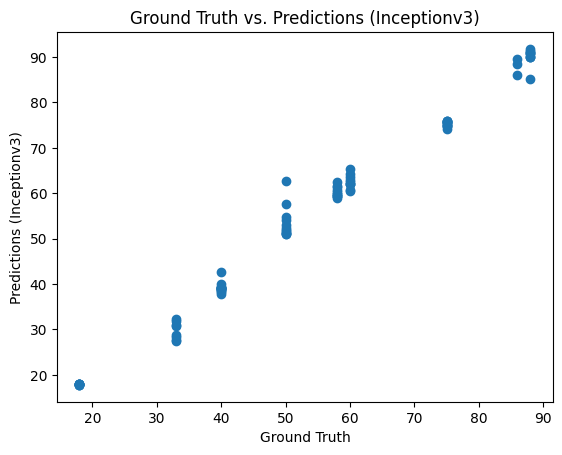

In [ ]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the saved DenseNet201 model
model_inceptionv3 = load_model('/content/drive/MyDrive/Regression ASHOKA/model_save/Inceptionv3.h5')

# Load validation data from CSV file
csv_path = '/content/val.csv'
validation_data = pd.read_csv(csv_path)

# Extract Ground Truth as ground truth
ground_truth = validation_data['Derajat Kelengkungan'].values

# Perform predictions with the DenseNet201 model on validation data
# Make sure you load and preprocess the validation data according to the format required by the model
predictions_Inceptionv3 = model_inceptionv3.predict(val_generator)

# Plotting Ground Truth vs. Predictions
plt.scatter(ground_truth, predictions_Inceptionv3.flatten())
plt.xlabel('Ground Truth')
plt.ylabel('Predictions (Inceptionv3)')
plt.title('Ground Truth vs. Predictions (Inceptionv3)')
plt.show()


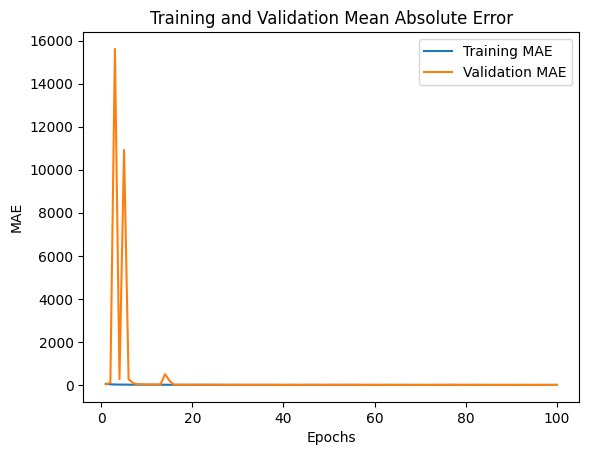

In [ ]:
import matplotlib.pyplot as plt

# Plotting MAE pada set pelatihan dan set validasi
train_mae = history_inceptionv3.history['mean_absolute_error']
val_mae = history_inceptionv3.history['val_mean_absolute_error']
epochs = range(1, len(train_mae) + 1)

plt.plot(epochs, train_mae, label='Training MAE')
plt.plot(epochs, val_mae, label='Validation MAE')
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

# DenseNet201

In [ ]:
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay

# Menggunakan DenseNet121 sebagai pre-trained model
pre_trained_model = DenseNet201(input_shape=(256, 256, 3), weights='imagenet', include_top=False)

# Menambahkan GlobalAveragePooling2D sebagai alternatif Flatten
x = GlobalAveragePooling2D()(pre_trained_model.output)

# Menambahkan beberapa layer Dense tambahan dengan BatchNormalization
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)

# Mengganti output layer untuk tugas regresi
x = Dense(1, activation='linear')(x)

model = Model(pre_trained_model.input, x)

# Compile model dengan optimizer Adam dan learning rate scheduling
initial_learning_rate = 0.001
lr_schedule = ExponentialDecay(initial_learning_rate, decay_steps=10000, decay_rate=0.9)
optimizer = Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['mean_absolute_error'])

history = model.fit(train_generator, epochs=100, validation_data=val_generator, verbose=1)


Epoch 1/100
23/23 [==============================] - 128s 1s/step - loss: 53.4917 - mean_absolute_error: 53.4917 - val_loss: 31.7257 - val_mean_absolute_error: 31.7257
Epoch 2/100
23/23 [==============================] - 19s 828ms/step - loss: 35.1097 - mean_absolute_error: 35.1097 - val_loss: 67.7721 - val_mean_absolute_error: 67.7721
Epoch 3/100
23/23 [==============================] - 20s 839ms/step - loss: 17.1300 - mean_absolute_error: 17.1300 - val_loss: 33.8595 - val_mean_absolute_error: 33.8595
Epoch 4/100
23/23 [==============================] - 21s 894ms/step - loss: 12.7476 - mean_absolute_error: 12.7476 - val_loss: 1124.6646 - val_mean_absolute_error: 1124.6646
Epoch 5/100
23/23 [==============================] - 19s 828ms/step - loss: 11.4728 - mean_absolute_error: 11.4728 - val_loss: 19560.5703 - val_mean_absolute_error: 19560.5703
Epoch 6/100
23/23 [==============================] - 19s 833ms/step - loss: 14.1120 - mean_absolute_error: 14.1120 - val_loss: 1001.0663 - val

In [ ]:
model.save('/content/drive/MyDrive/Regression ASHOKA/model_save/DenseNet201.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 2s 137ms/step


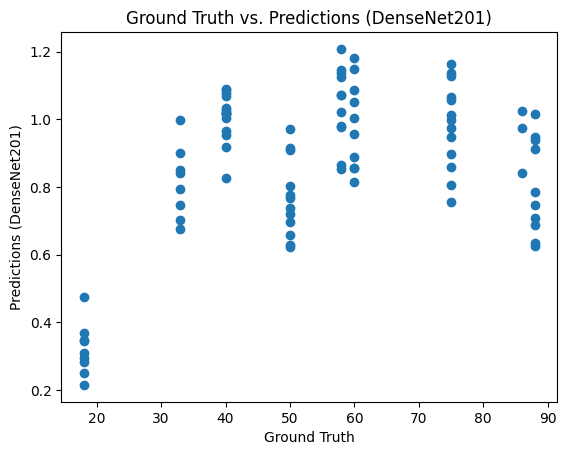

In [ ]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the saved DenseNet201 model
model = load_model('/content/drive/MyDrive/Regression ASHOKA/model_save/DenseNet201.h5')

# Load validation data from CSV file
csv_path = '/content/val.csv'
validation_data = pd.read_csv(csv_path)

# Extract Ground Truth as ground truth
ground_truth = validation_data['Derajat Kelengkungan'].values

# Perform predictions with the DenseNet201 model on validation data
# Make sure you load and preprocess the validation data according to the format required by the model
predictions_DenseNet201 = model.predict(val_generator)

# Plotting Ground Truth vs. Predictions
plt.scatter(ground_truth, predictions_DenseNet201.flatten())
plt.xlabel('Ground Truth')
plt.ylabel('Predictions (DenseNet201)')
plt.title('Ground Truth vs. Predictions (DenseNet201)')
plt.show()


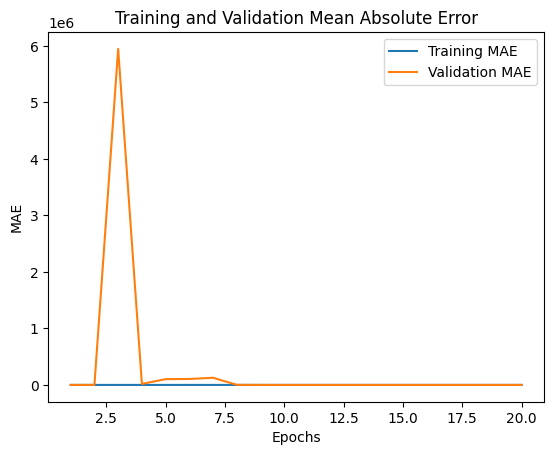

In [ ]:
import matplotlib.pyplot as plt

# Plotting MAE pada set pelatihan dan set validasi
train_mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']
epochs = range(1, len(train_mae) + 1)

plt.plot(epochs, train_mae, label='Training MAE')
plt.plot(epochs, val_mae, label='Validation MAE')
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

# DenseNet121

In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay

# Menggunakan DenseNet121 sebagai pre-trained model
pre_trained_model = DenseNet121(input_shape=(256, 256, 3), weights='imagenet', include_top=False)

# Menambahkan GlobalAveragePooling2D sebagai alternatif Flatten
x = GlobalAveragePooling2D()(pre_trained_model.output)

# Menambahkan beberapa layer Dense tambahan dengan BatchNormalization
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)

# Mengganti output layer untuk tugas regresi
x = Dense(1, activation='linear')(x)

model_DenseNet121 = Model(pre_trained_model.input, x)

# Compile model dengan optimizer Adam dan learning rate scheduling
initial_learning_rate = 0.001
lr_schedule = ExponentialDecay(initial_learning_rate, decay_steps=10000, decay_rate=0.9)
optimizer = Adam(learning_rate=lr_schedule)

model_DenseNet121.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['mean_absolute_error'])

history_DenseNet121 = model_DenseNet121.fit(train_generator, epochs=100, validation_data=val_generator, verbose=1)


29084464/29084464 [==============================] - 2s 0us/step
Epoch 1/100
23/23 [==============================] - 81s 833ms/step - loss: 52.9728 - mean_absolute_error: 52.9728 - val_loss: 47.3382 - val_mean_absolute_error: 47.3382
Epoch 2/100
23/23 [==============================] - 17s 738ms/step - loss: 35.7039 - mean_absolute_error: 35.7039 - val_loss: 29.4364 - val_mean_absolute_error: 29.4364
Epoch 3/100
23/23 [==============================] - 17s 727ms/step - loss: 18.3467 - mean_absolute_error: 18.3467 - val_loss: 3672.9863 - val_mean_absolute_error: 3672.9863
Epoch 4/100
23/23 [==============================] - 17s 739ms/step - loss: 16.8423 - mean_absolute_error: 16.8423 - val_loss: 3815.2734 - val_mean_absolute_error: 3815.2734
Epoch 5/100
23/23 [==============================] - 17s 726ms/step - loss: 15.7698 - mean_absolute_error: 15.7698 - val_loss: 5366.0278 - val_mean_absolute_error: 5366.0278
Epoch 6/100
23/23 [==============================] - 17s 748ms/step - los

In [ ]:
model_DenseNet121.save('/content/drive/MyDrive/Regression ASHOKA/model_save/DenseNet121.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 3s 169ms/step


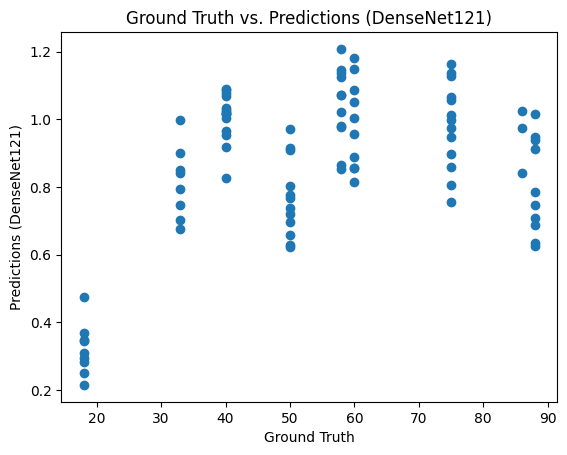

In [ ]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the saved DenseNet201 model
model_DenseNet121 = load_model('/content/drive/MyDrive/Regression ASHOKA/model_save/DenseNet201.h5')

# Load validation data from CSV file
csv_path = '/content/val.csv'
validation_data = pd.read_csv(csv_path)

# Extract Ground Truth as ground truth
ground_truth = validation_data['Derajat Kelengkungan'].values

# Perform predictions with the DenseNet201 model on validation data
# Make sure you load and preprocess the validation data according to the format required by the model
predictions_DenseNet121 = model_DenseNet121.predict(val_generator)

# Plotting Ground Truth vs. Predictions
plt.scatter(ground_truth, predictions_DenseNet121.flatten())
plt.xlabel('Ground Truth')
plt.ylabel('Predictions (DenseNet121)')
plt.title('Ground Truth vs. Predictions (DenseNet121)')
plt.show()


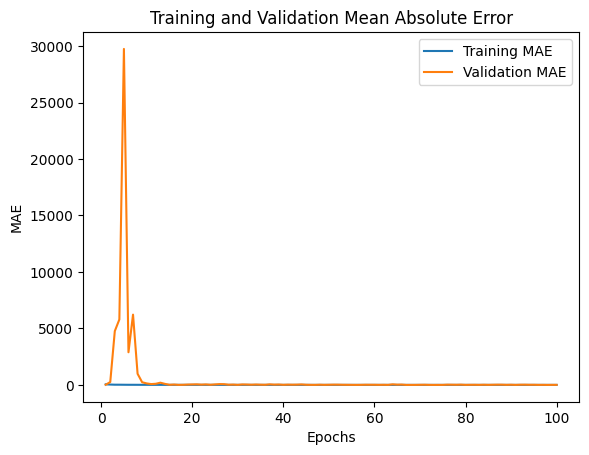

In [ ]:
import matplotlib.pyplot as plt

# Plotting MAE pada set pelatihan dan set validasi
train_mae = history_DenseNet121.history['mean_absolute_error']
val_mae = history_DenseNet121.history['val_mean_absolute_error']
epochs = range(1, len(train_mae) + 1)

plt.plot(epochs, train_mae, label='Training MAE')
plt.plot(epochs, val_mae, label='Validation MAE')
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

# DenseNet169


In [ ]:
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay

# Menggunakan DenseNet121 sebagai pre-trained model
pre_trained_model = DenseNet169(input_shape=(256, 256, 3), weights='imagenet', include_top=False)

# Menambahkan GlobalAveragePooling2D sebagai alternatif Flatten
x = GlobalAveragePooling2D()(pre_trained_model.output)

# Menambahkan beberapa layer Dense tambahan dengan BatchNormalization
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)

# Mengganti output layer untuk tugas regresi
x = Dense(1, activation='linear')(x)

model_DenseNet169 = Model(pre_trained_model.input, x)

# Compile model dengan optimizer Adam dan learning rate scheduling
initial_learning_rate = 0.001
lr_schedule = ExponentialDecay(initial_learning_rate, decay_steps=10000, decay_rate=0.9)
optimizer = Adam(learning_rate=lr_schedule)

model_DenseNet169.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['mean_absolute_error'])

history_DenseNet169 = model_DenseNet169.fit(train_generator, epochs=100, validation_data=val_generator, verbose=1)


51877672/51877672 [==============================] - 3s 0us/step
Epoch 1/100
23/23 [==============================] - 154s 2s/step - loss: 52.3075 - mean_absolute_error: 52.3075 - val_loss: 53.2945 - val_mean_absolute_error: 53.2945
Epoch 2/100
23/23 [==============================] - 19s 805ms/step - loss: 32.8296 - mean_absolute_error: 32.8296 - val_loss: 529.4463 - val_mean_absolute_error: 529.4463
Epoch 3/100
23/23 [==============================] - 19s 803ms/step - loss: 17.8998 - mean_absolute_error: 17.8998 - val_loss: 4166.0166 - val_mean_absolute_error: 4166.0166
Epoch 4/100
23/23 [==============================] - 20s 847ms/step - loss: 19.3438 - mean_absolute_error: 19.3438 - val_loss: 4845.3003 - val_mean_absolute_error: 4845.3003
Epoch 5/100
23/23 [==============================] - 19s 793ms/step - loss: 16.5673 - mean_absolute_error: 16.5673 - val_loss: 6363.5850 - val_mean_absolute_error: 6363.5850
Epoch 6/100
23/23 [==============================] - 19s 800ms/step - los

In [ ]:
model_DenseNet169.save('/content/drive/MyDrive/Regression ASHOKA/model_save/DenseNet169.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 3s 197ms/step


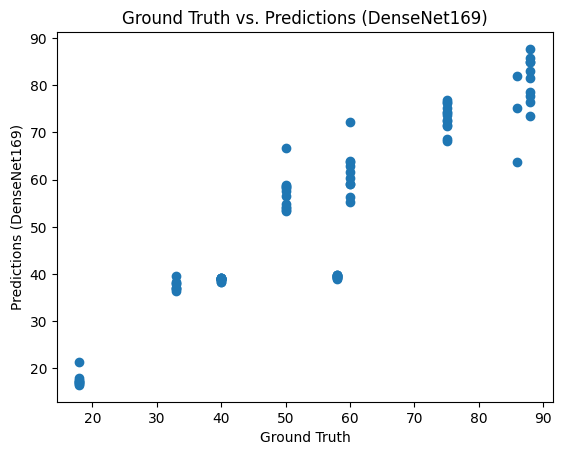

In [ ]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the saved DenseNet201 model
model_DenseNet169 = load_model('/content/drive/MyDrive/Regression ASHOKA/model_save/DenseNet169.h5')

# Load validation data from CSV file
csv_path = '/content/val.csv'
validation_data = pd.read_csv(csv_path)

# Extract Ground Truth as ground truth
ground_truth = validation_data['Derajat Kelengkungan'].values

# Perform predictions with the DenseNet201 model on validation data
# Make sure you load and preprocess the validation data according to the format required by the model
predictions_DenseNet169 = model_DenseNet169.predict(val_generator)

# Plotting Ground Truth vs. Predictions
plt.scatter(ground_truth, predictions_DenseNet169.flatten())
plt.xlabel('Ground Truth')
plt.ylabel('Predictions (DenseNet169)')
plt.title('Ground Truth vs. Predictions (DenseNet169)')
plt.show()


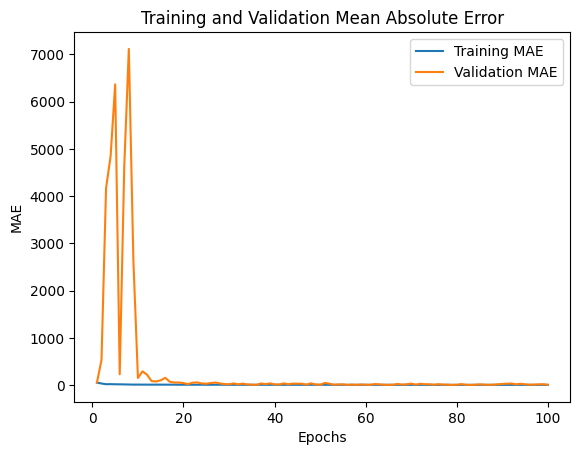

In [ ]:
import matplotlib.pyplot as plt

# Plotting MAE pada set pelatihan dan set validasi
train_mae = history_DenseNet169.history['mean_absolute_error']
val_mae = history_DenseNet169.history['val_mean_absolute_error']
epochs = range(1, len(train_mae) + 1)

plt.plot(epochs, train_mae, label='Training MAE')
plt.plot(epochs, val_mae, label='Validation MAE')
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()